In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from metrics import custom_score, ultimate_score

random_seed = 42
np.random.seed(random_seed)

In [2]:
# there are max 500 features
# we have to predict 1000 1s among 5000 samples
# max income for good prediction is: 10 * 1000 = 10 000
# so we should consider max 10 000 / 200 = 50 features
MAX_FEATURES = 50
n_features = np.arange(1, MAX_FEATURES + 1)

# Loading data

In [3]:
df = pd.read_csv("data/x_train.txt", sep=" ", header=None)
print(df.shape)

y = pd.read_csv("data/y_train.txt", sep=" ", header=None)
y = np.array(y).ravel()
print(y.shape)

df_test = pd.read_csv("data/x_test.txt", sep=" ", header=None)
print(df_test.shape)

(5000, 500)
(5000,)
(5000, 500)


In [4]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# computing k to predict

# df_test.shape[0]
# we want to identify 1000 ones in 5000 dataset (there should be about 2500 ones there - balanced)

k_test = int(1000 / df_test.shape[0] * X_test.shape[0]) # equivalently, we want look for 300 ones in X_test
k_test

300

In [6]:
def get_sorted_features(init_model, X_train, y_train, **kwargs):
    model = init_model(**kwargs)
    model.fit(X_train, y_train)
    try:
        importances = model.feature_importances_
    except AttributeError:
        importances = np.abs(model.coef_).reshape(-1,)
    
    feature_names = np.arange(X_train.shape[1])
    
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
    features = np.array(feature_importance_df.feature)
    
    return features

def find_optimal_features(init_model, X_train, y_train, X_test, y_test, features, **kwargs):
    scores = []
    ultimate_scores = []
    
    for i in range(1, MAX_FEATURES + 1):
        selected_features = features[:i]
        X_train_filtered = X_train[:, selected_features]
        X_test_filtered = X_test[:, selected_features]
        
        model = init_model(**kwargs)
        model.fit(X_train_filtered, y_train)
        prob = model.predict_proba(X_test_filtered)
        
        score = custom_score(y_test, prob, k_test)
        scores.append(score)
        ult_score = ultimate_score(y_test, prob, k_test, i)
        ultimate_scores.append(ult_score)
    return scores, ultimate_scores

def plot_scores(n_features, scores, ultimate_scores):
    fig, ax1 = plt.subplots()

    ax1.plot(n_features, scores, color='royalblue', linewidth=2, label='score')
    ax1.set_ylabel('Score', color='royalblue')
    ax1.tick_params(axis='y', labelcolor='royalblue')
    
    ax2 = ax1.twinx()
    ax2.plot(n_features, ultimate_scores, color='darkorange', linewidth=2, label='ultimate_score')
    ax2.set_ylabel('Ultimate Score', color='darkorange')
    ax2.tick_params(axis='y', labelcolor='darkorange')
    
    ax1.set_xlabel('Number of Features')
    plt.title('Model Scores vs Ultimate Scores')
    
    ax1.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Random forest feature importance

In [7]:
features = get_sorted_features(RandomForestClassifier, X_train, y_train, n_estimators=100, max_depth=5, n_jobs=-1, random_state=random_seed)

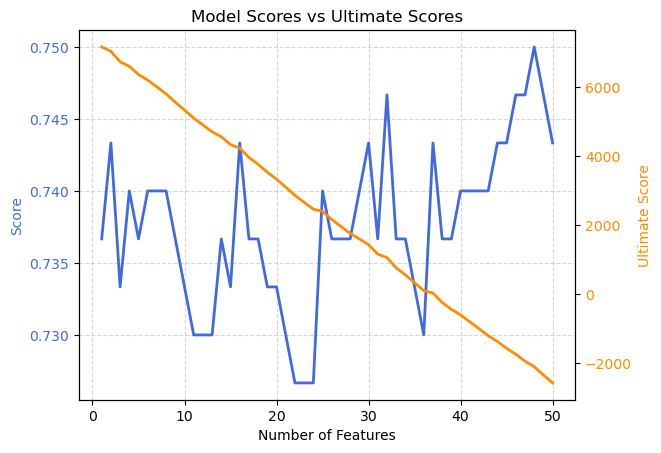

max score: 7160.0
no. of features: 1
selected_features: [2]


In [8]:
# Logistic regression
scores, ultimate_scores = find_optimal_features(LogisticRegression, X_train, y_train, X_test, y_test, features, random_state=random_seed)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

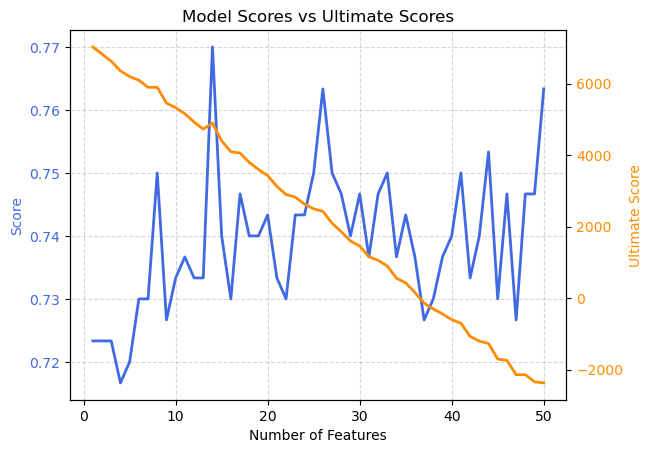

max score: 7030.0
no. of features: 1
selected_features: [2]


In [9]:
# Random forest
scores, ultimate_scores = find_optimal_features(RandomForestClassifier, X_train, y_train, X_test, y_test, features, n_estimators=100, max_depth=5, n_jobs=-1, random_state=random_seed)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

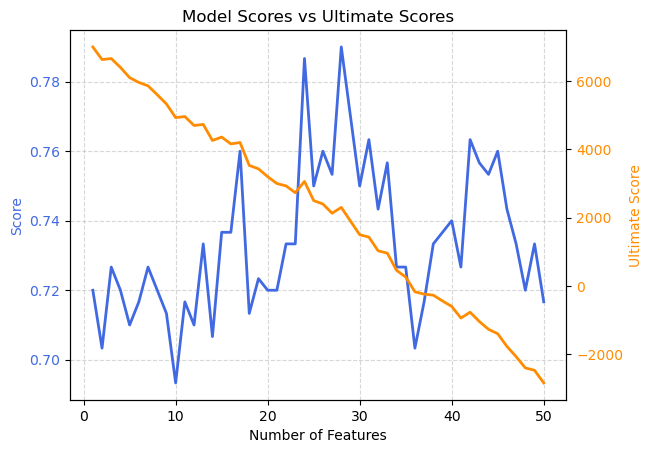

max score: 7000.0
no. of features: 1
selected_features: [2]


In [10]:
# XGB
scores, ultimate_scores = find_optimal_features(XGBClassifier, X_train, y_train, X_test, y_test, features, n_estimators=100, max_depth=5, n_jobs=-1, random_state=random_seed)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

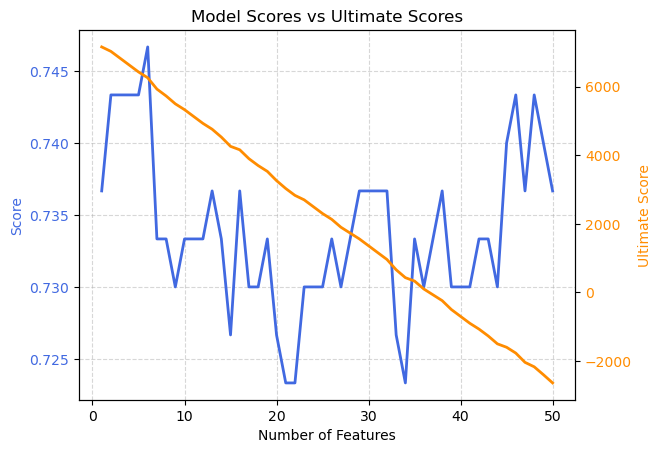

max score: 7160.0
no. of features: 1
selected_features: [2]


In [11]:
# SVM
scores, ultimate_scores = find_optimal_features(SVC, X_train, y_train, X_test, y_test, features, kernel='linear', probability=True, random_state=random_seed)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

C:\Users\jakub\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Nie można odnaleźć określonego pliku
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jakub\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\jakub\anaconda3\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jakub\anaconda3\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\jakub\anaconda3\Lib\subprocess.py", line 1540, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

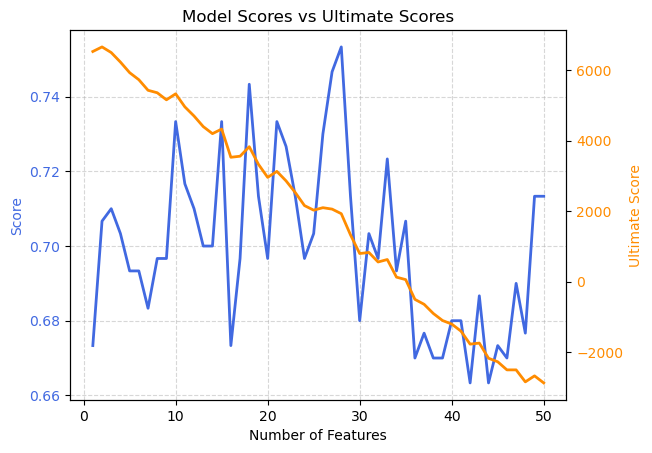

max score: 6660.0
no. of features: 2
selected_features: [2 3]


In [12]:
# KNN

scores, ultimate_scores = find_optimal_features(KNeighborsClassifier, X_train, y_train, X_test, y_test, features, n_neighbors=5)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

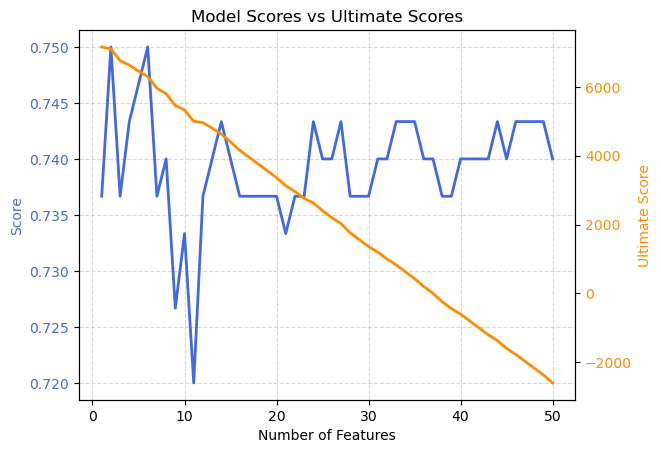

max score: 7160.0
no. of features: 1
selected_features: [2]


In [13]:
# NB

scores, ultimate_scores = find_optimal_features(GaussianNB, X_train, y_train, X_test, y_test, features)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

# XGB feature importance

In [14]:
features = get_sorted_features(XGBClassifier, X_train, y_train, n_estimators=100, max_depth=5, n_jobs=-1, random_state=random_seed)

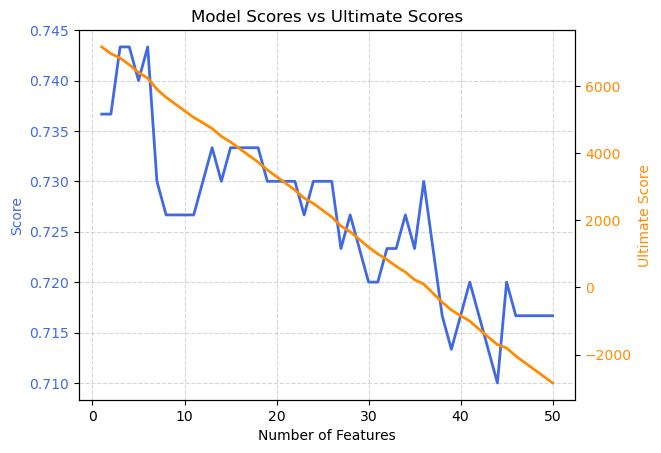

max score: 7160.0
no. of features: 1
selected_features: [2]


In [15]:
# Logistic regression
scores, ultimate_scores = find_optimal_features(LogisticRegression, X_train, y_train, X_test, y_test, features, random_state=random_seed)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

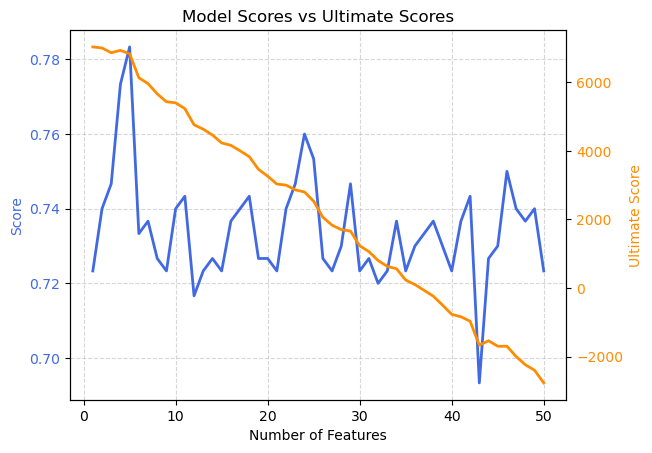

max score: 7030.0
no. of features: 1
selected_features: [2]


In [16]:
# Random forest
scores, ultimate_scores = find_optimal_features(RandomForestClassifier, X_train, y_train, X_test, y_test, features, n_estimators=100, max_depth=5, n_jobs=-1, random_state=random_seed)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

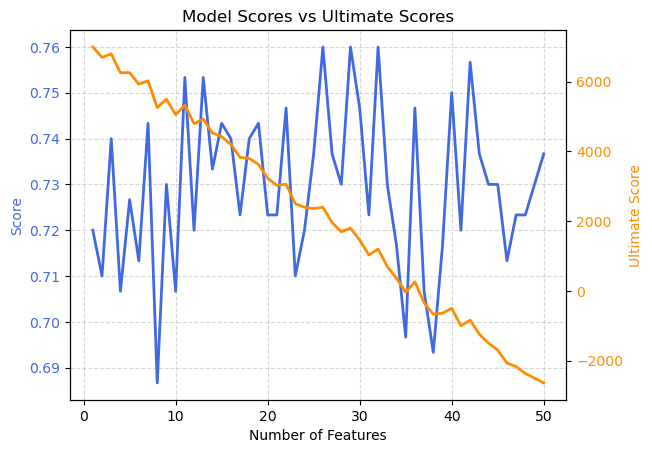

max score: 7000.0
no. of features: 1
selected_features: [2]


In [17]:
# XGB
scores, ultimate_scores = find_optimal_features(XGBClassifier, X_train, y_train, X_test, y_test, features, n_estimators=100, max_depth=5, n_jobs=-1, random_state=random_seed)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

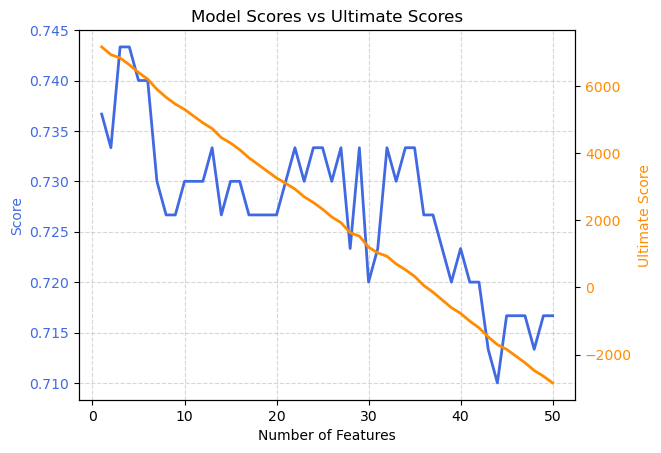

max score: 7160.0
no. of features: 1
selected_features: [2]


In [18]:
# SVM
scores, ultimate_scores = find_optimal_features(SVC, X_train, y_train, X_test, y_test, features, kernel='linear', probability=True, random_state=random_seed)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

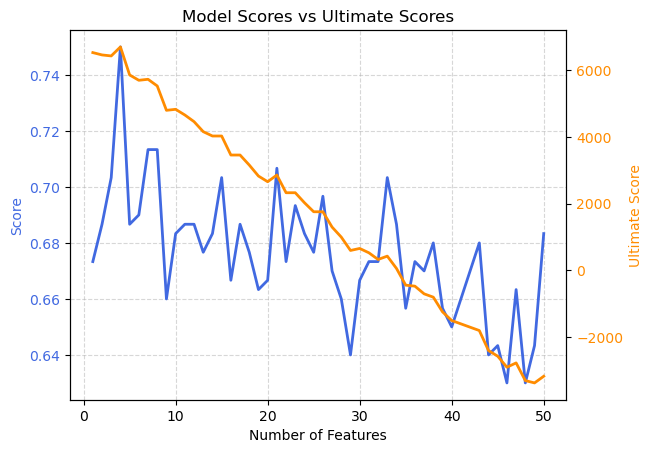

max score: 6700.0
no. of features: 4
selected_features: [  2 376   4 288]


In [19]:
# KNN

scores, ultimate_scores = find_optimal_features(KNeighborsClassifier, X_train, y_train, X_test, y_test, features, n_neighbors=5)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

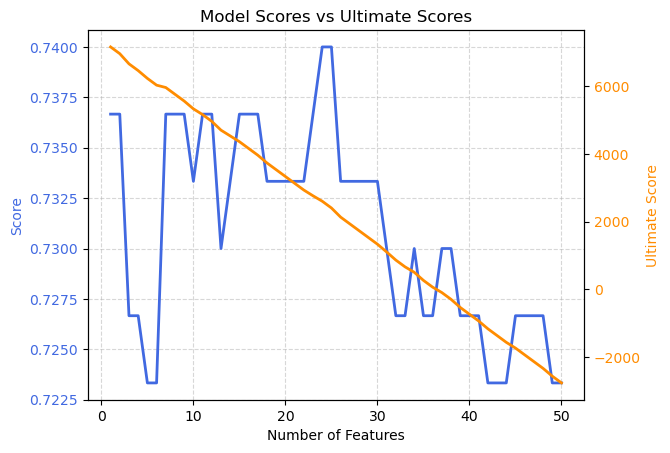

max score: 7160.0
no. of features: 1
selected_features: [2]


In [20]:
# NB

scores, ultimate_scores = find_optimal_features(GaussianNB, X_train, y_train, X_test, y_test, features)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

# Logistic regression feature importance

In [21]:
features = get_sorted_features(LogisticRegression, X_train, y_train, random_state=random_seed)
# different feature importance

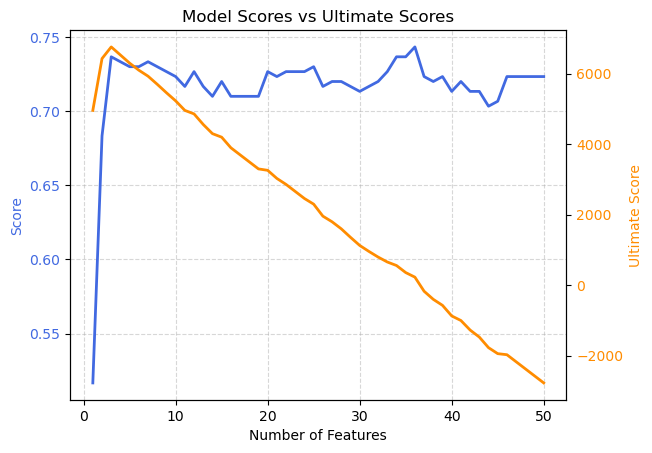

max score: 6760.0
no. of features: 3
selected_features: [228 462   2]


In [22]:
# Logistic regression
scores, ultimate_scores = find_optimal_features(LogisticRegression, X_train, y_train, X_test, y_test, features, random_state=random_seed)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

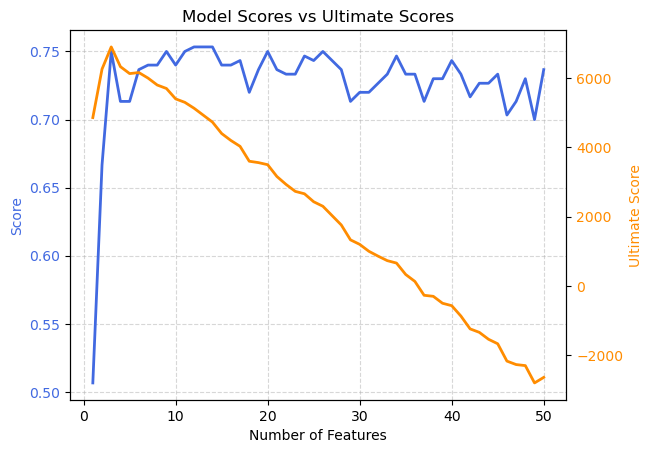

max score: 6900.0
no. of features: 3
selected_features: [228 462   2]


In [23]:
# Random forest
scores, ultimate_scores = find_optimal_features(RandomForestClassifier, X_train, y_train, X_test, y_test, features, n_estimators=100, max_depth=5, n_jobs=-1, random_state=random_seed)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

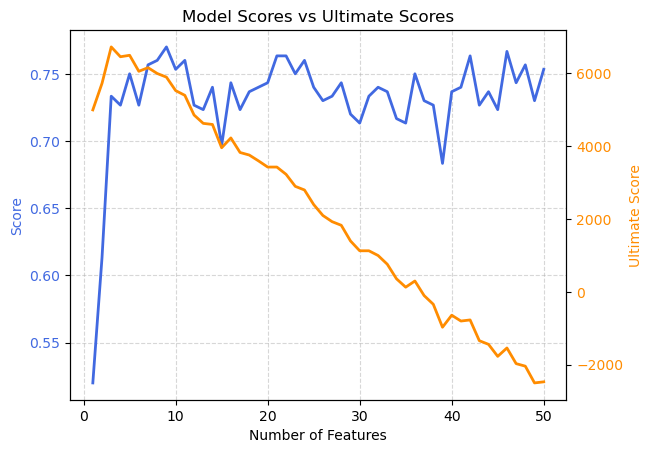

max score: 6730.0
no. of features: 3
selected_features: [228 462   2]


In [24]:
# XGB
scores, ultimate_scores = find_optimal_features(XGBClassifier, X_train, y_train, X_test, y_test, features, n_estimators=100, max_depth=5, n_jobs=-1, random_state=random_seed)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

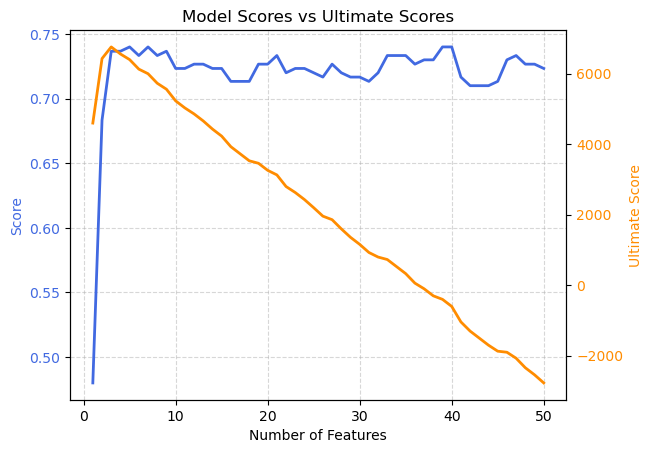

max score: 6760.0
no. of features: 3
selected_features: [228 462   2]


In [25]:
# SVM
scores, ultimate_scores = find_optimal_features(SVC, X_train, y_train, X_test, y_test, features, kernel='linear', probability=True, random_state=random_seed)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

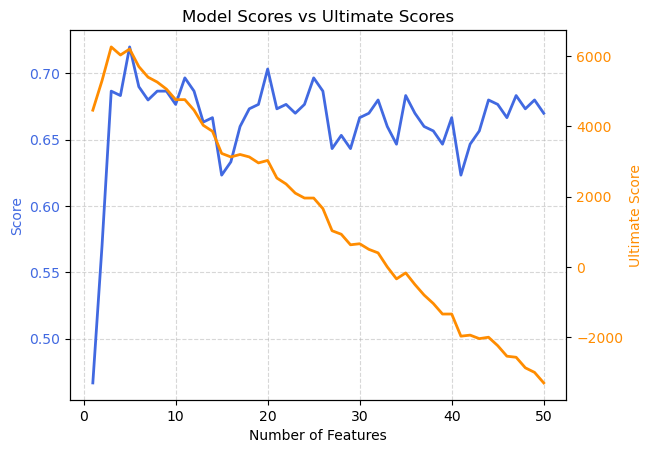

max score: 6260.0
no. of features: 3
selected_features: [228 462   2]


In [26]:
# KNN

scores, ultimate_scores = find_optimal_features(KNeighborsClassifier, X_train, y_train, X_test, y_test, features, n_neighbors=5)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

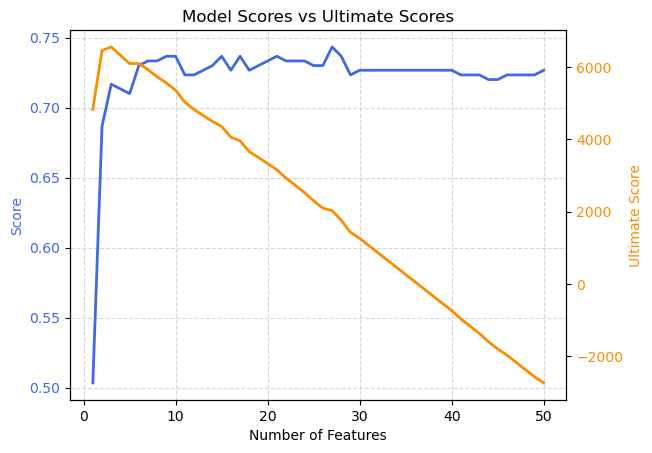

max score: 6560.0
no. of features: 3
selected_features: [228 462   2]


In [27]:
# NB

scores, ultimate_scores = find_optimal_features(GaussianNB, X_train, y_train, X_test, y_test, features)

plot_scores(n_features, scores, ultimate_scores)

print(f"max score: {np.max(ultimate_scores)}")
n_f = n_features[np.argmax(ultimate_scores)]
print(f"no. of features: {n_f}")
print(f"selected_features: {features[:n_f]}")

# Conclusions
for a fixed feature ordering models tend to choose identical number of features, so the results are very close to each other \
RF and XGB first feature (2) is the same, for LR different features are selected \
the best total scores are obtained for very small no. of features \
it is hard to distinguish between model's performance if they are based just on one feature (some of them have identical scores then) \
for RF features, the results among no. of features do not drastically change (0.68 - 0.78) \
it may be difficult to assess models on a single random seed, perhaps repeat experiments \
KNN seems to be the worst model \
SVM is the most time-consuming model \
first 4 models seem to be generally superior: LR, RF, XGB, SVM - we should focus on them
